In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import collections
import operator
%matplotlib  

Using matplotlib backend: Qt5Agg


In [2]:
#G2 = nx.duplication_divergence_graph(8,0.01,seed=None)
G= nx.read_gml('data.gml') 

#ebunch=[(1,0),(0,2),(0,3)]

copy = G.copy()

G2=nx.convert_node_labels_to_integers(copy, first_label=1, ordering='default') #navie anonymization



In [3]:
def calculate_measure(G2):
    print(nx.info(G2))

    betweenness = nx.betweenness_centrality(G2, normalized=True).values() 
    closeness = nx.closeness_centrality(G2).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G2))

    if G2.is_directed():
        calc_measure_dir(G2)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G2), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G2.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G2))  
    

In [4]:
calculate_measure(G2)
print(nx.diameter(G2) )

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 254
Max betweeness centrality:  0.5699890527836184
Average betweenness centrality 0.021881977671451357
Average closeness centrality 0.3893412505666164
Max closeness centrality:  0.6440677966101694
Average clustering 0.5731367499320134
Assortativity measures: 
 Coeff:  -0.16522513442236916
5


In [ ]:
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 


In [5]:
ebunch=[(55,56),(45,29),(12,14), (12,15),(20,21),(35,36),(44,27),(41,26),(75,49),(54,52),(30,35),(34,28)] # remove 5%
ebunch1=[(41,55),(15,20),(14,4), (54,8),(44,6),(66,18),(25,55),(72,24),(44,15),(46,28),(57,50),(42,48)] # add 5% 

In [6]:
G2.remove_edges_from(ebunch)


#plt.figure(figsize=(15,15))
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 

In [7]:
G2.add_edges_from(ebunch1)
#plt.figure(figsize=(15,15))
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 


In [8]:
calculate_measure(G2) # 5% metrics
print(nx.diameter(G2) ) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 253
Average degree:   6.5714
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 253
Max betweeness centrality:  0.5485961677500344
Average betweenness centrality 0.023002961950330365
Average closeness centrality 0.3789002257240197
Max closeness centrality:  0.6178861788617886
Average clustering 0.49598962916380773
Assortativity measures: 
 Coeff:  -0.11510099578246542
6


In [9]:
 
ebunch2=[(17,11),(52,27),(66,58),(72,49), (72,69),(18,66),(25,42),(21,22),(77,49),(48,42),(32,24),(28,44),(25,46),(22,77),(54,8),(68,58), (62,49),(72,24),(5,1),(8,54),(33,12),(34,12),(45,12),(72,42),(67,77)] 

#10 percent edges removal


 
ebunch3=[(33,21),(5,3),(34,9),(68,75), (33,75),(18,25),(29,47),(1,11),(77,55),(42,68),(75,1),(56,3),(72,2),(65,2),(50,60),(63,70), (52,4),(36,1),(27,40),(30,70),(22,70),(35,70),(25,68),(77,10),(73,10),(54,10),(45,10),] 


In [10]:
G2.remove_edges_from(ebunch2)

#plt.figure(figsize=(15,15))
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 

In [11]:
G2.add_edges_from(ebunch3)


#plt.figure(figsize=(15,15))
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 

In [12]:
calculate_measure(G2)
print(nx.diameter(G2) ) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 259
Average degree:   6.7273
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 259
Max betweeness centrality:  0.4145414844511308
Average betweenness centrality 0.022884483937115514
Average closeness centrality 0.3786180983889491
Max closeness centrality:  0.6031746031746031
Average clustering 0.4195079784968775
Assortativity measures: 
 Coeff:  -0.018403528663924765
6


In [ ]:

def random_edge(G2, del_orig=True):
    '''
    Create a new random edge and delete one of its current edge if del_orig is True.
    :param graph: networkx graph
    :param del_orig: bool
    :return: networkx graph
    '''
    edges = list(G2.edges)
    nonedges = list(nx.non_edges(G2))

    # random edge choice
    chosen_edge = random.choice(edges)
    chosen_nonedge = random.choice([x for x in nonedges if chosen_edge[0] == x[0]])

    if del_orig:
        # delete chosen edge
        G2.remove_edge(chosen_edge[0], chosen_edge[1])
    # add new edge
    G2.add_edge(chosen_nonedge[0], chosen_nonedge[1])

    return G2   

In [ ]:

new_graph = random_edge(G2, del_orig=True)
plt.figure(figsize=(15,15))
nx.draw(new_graph, with_labels=True, edge_color='b', node_color='orange')


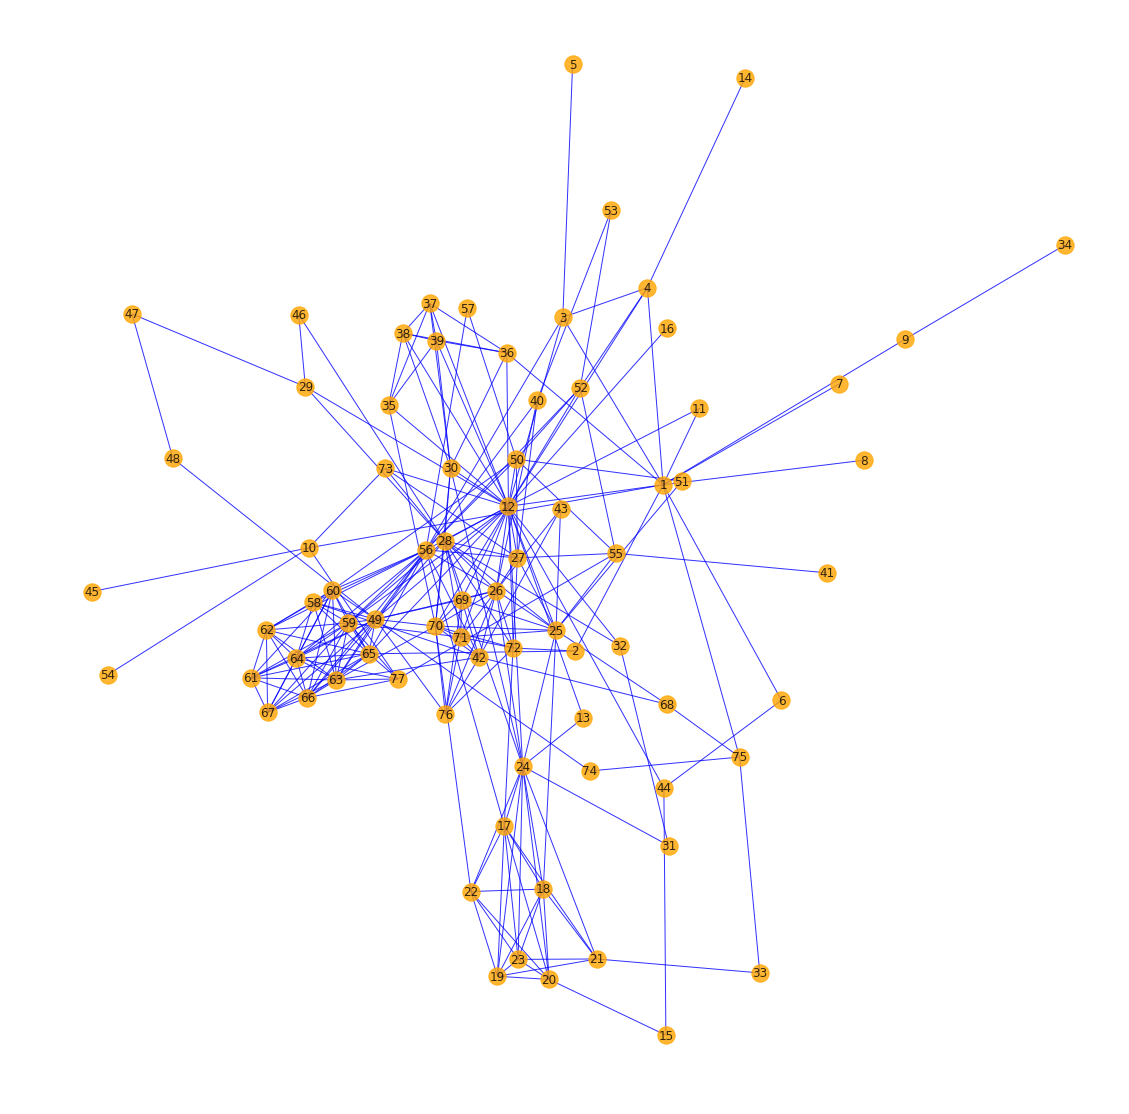

In [13]:

plt.figure(figsize=(15,15))
nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 

In [ ]:
G2.has_edge(12,8) 
#sorted(G2.degree, key=lambda x: x[1], reverse=True)

In [ ]:
sorted(G2.degree, key=lambda x: x[1], reverse=True) 

In [ ]:
e = [12,56,59,49,63,42,67,17,36,55,10,13,15] 

In [ ]:
G2.remove_nodes_from(e)

#plt.figure(figsize=(15,15))
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True) 

In [ ]:

ebunch5=[(16,41),(45,54),(45,41),(45,1)] 
G2.add_edges_from(ebunch5)
G2.add_nodes_from(e)
e1 =  [(12,1),(56,54),(59,41),(49,1),(63,41),(42,54),(67,41),(17,1),(36,2),(55,10),(10,13),(13,15),(15,6)]
G2.add_edges_from(e1)

In [14]:

ebunch6=[(12,41),(56,54),(59,41),(49,75), (63,12),(42,12),(67,47),(17,11),(36,52),(10,13),(13,1),(15,3),
(12,1),(12,2),(12,10),(12,15),(12,20), (12,25),(12,30),(12,35),(12,40),(12,50),(56,5),(56,1),(56,10),(56,15), 
(56,18),(59,12),(49,10),(49,1),(49,12), (49,25),(49,30),(63,35),(63,40),(63,50),(63,5),(42,1),(67,10),(36,15),(55,15),
(15,57),(13,29),(13,14), (13,15),(20,13),(35,13),(44,13),(41,13),(75,10),(54,55),(36,35),(17,28)        ]
G2.add_edges_from(ebunch6)

ebunch7=[(55,21),(53,3),(55,9),(55,75), (55,76),(67,25),(67,28),(67,11),(67,55),(67,21),(75,11),(75,3),(75,2),(75,3),(75,60),

        (25,70), (25,4),(25,1),(25,40),(25,72),(37,70),(37,73),(37,68),(37,10),(37,11),(35,11),(45,10),] 

G2.add_edges_from(ebunch7)

ebunch8 = [(41,55),(41,20),(41,4), (41,8),(42,6),(42,18),(42,55),(42,24),(42,15),(42,28),(42,50),(42,48),
          (45,55),(45,20),(45,4), (45,8),(50,6),(50,18),(50,55),(50,24),(50,15),(50,28),(50,67),(50,48),
          (17,12),(17,27),(17,58),(17,49), (17,69),(17,66),(57,42),(57,22),(57,49),(57,42),(57,24),(57,44),
           (57,46),(60,77),(60,8),(48,49),(48,24),(48,1),(63,55)] 

G2.add_edges_from(ebunch8)

#plt.figure(figsize=(15,15))
#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True)  # 100% perturbation


In [15]:
calculate_measure(G2) 
print(nx.diameter(G2) )  

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 367
Average degree:   9.5325
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 367
Max betweeness centrality:  0.23841310232913418
Average betweenness centrality 0.016769195716564135
Average closeness centrality 0.45227770189845007
Max closeness centrality:  0.6666666666666666
Average clustering 0.39583761866018313
Assortativity measures: 
 Coeff:  -0.08307395546220005
5


In [ ]:
G2.node[10] # H0 queary returns labels of  node


In [ ]:
G2.degree(10) # H1 queary returns degree of specified node 


In [ ]:
list(G2.degree((G2.neighbors(10)) )  ) # H2 returns the degrees of node neighbors
    

In [ ]:
list(nx.bfs_edges(G2, 10)) 

In [ ]:

def neighbors(G2, n):
 
 return list(G2.neighbors(48))
print(" neighbours = ", neighbors(G2,'1'))